### Simple split
Demo showing how a particular split is done in a decission tree using part of the iris data set

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [2]:
# same as in R dat = iris[91:110,c(1,2,5)]
iris_sub = iris.data[90:110,0:2]
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline

In [3]:
%load_ext rpy2.ipython

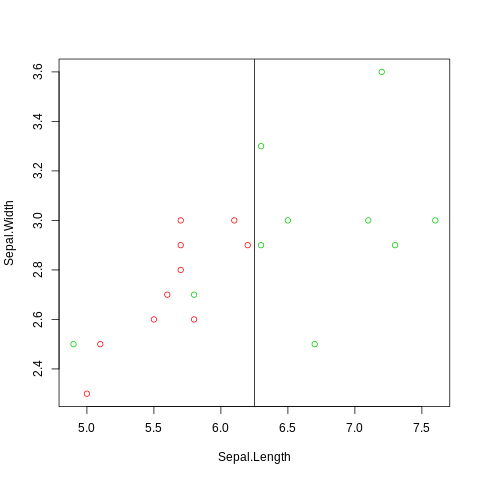

In [4]:
%%R
dat = iris[91:110,c(1,2,5)]
dat
plot(dat[,1:2],col=dat[,3],pt=2)
abline(v=6.25)

In [5]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(iris_sub, iris.target[90:110])

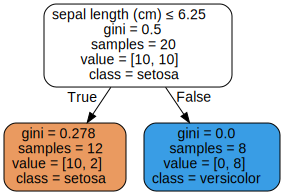

In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names[0:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Calculating of the Gini Index for the splits

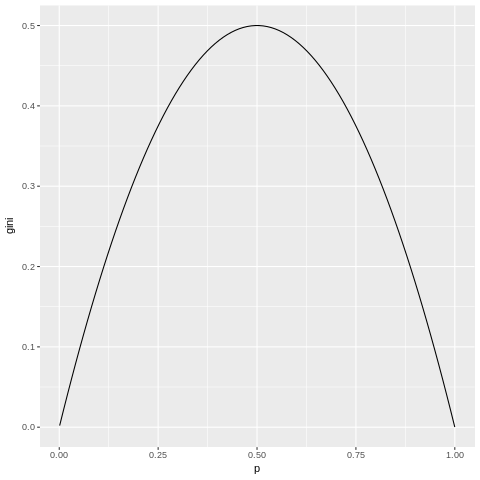

In [7]:
%%R
library(ggplot2)
library(tidyr)
p = seq(1E-3,1-1E-4,length.out = 100)
df = data.frame(p=p, gini=2*(p-p^2)) #1-p^2-(1-p)^2
ggplot(df) + geom_line(aes(x=p, y=gini))

In [8]:
giniroot = 0.5 # p = 0.5
giniright = 0  # p = 0.0
p = 2.0/12 
ginileft = 1 - p**2 - (1-p)**2
ginileft

0.2777777777777777

$$
\frac{N_t}{N} \cdot (\mathtt{giniroot} - \frac{N_{tr}}{ N_{t}} \cdot \mathtt{giniright} - \frac{N_{tL}}{N_{t}} \cdot  \mathtt{ginileft})
$$

In [9]:
impurity_decrease =  1 * (giniroot - 12/20 * ginileft - 8/20.0 * giniright)
impurity_decrease

0.33333333333333337

In [10]:
%%R
#library(rpart)
#dat = iris[91:110,c(1,2,5)]
#d = rpart(Species ~., data=dat)
#summary(d)

NULL
